In [1]:
import pyaurorax
import datetime
import matplotlib.pyplot as plt
import cartopy.crs
import cartopy

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

# Plot THEMIS ASI grid data

We are developing new array-wide standard grid data products for our data. We refer to these as 'grid files', since they are data organized into a common grid format: 512x1024 latitude by longitude (~0.3 degrees per bin).

For the optical instruments, the grid files are a downsampled pre-computed mosaic. Preventing the need to download the raw data and generate your own mosaic which can be tedious and compute/network intensive. Of course, if these grid files are not good enough, you can always still download the raw data and generate your own mosaic just like you want.

Let's have a look at downloading and plotting a grid file for the THEMIS ASI dataset.

In [2]:
# download a single one-minute THEMIS grid file
dataset = "THEMIS_ASI_GRID_MOSV001"
start_dt = datetime.datetime(2023, 3, 24, 8, 10, 0)
end_dt = datetime.datetime(2023, 3, 24, 8, 10, 0)
download_obj = aurorax.data.ucalgary.download(dataset, start_dt, end_dt)

# read the grid file
data = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames)
data.pretty_print()

Data:
  data               : GridData(grid=array(dims=(512, 1024, 20), dtype=float32), fill_value=-999.0, source_info=GridSourceInfoData(...))
  timestamp          : [20 datetimes]
  metadata           : [20 dictionaries]
  problematic_files  : []
  calibrated_data    : None
  dataset            : Dataset(name=THEMIS_ASI_GRID_MOSV001, short_description='THEMIS All Sky Ima...)


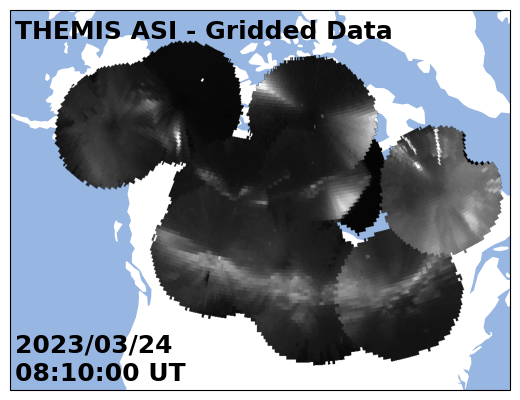

In [4]:
# Grab a single frame of grid data
grid = data.data.grid[:, :, 0]
timestamp = data.timestamp[0]

# Grab the fill value used to represent grid cells with no data
fill_val = data.data.fill_value

# Prep the grid data for plotting (make non-data cells transparent)
rgba_grid = at.grid_files.prep_grid_image(grid, fill_val, scale=[0, 12500])

# Create an empty map using cartopy
projection = cartopy.crs.NearsidePerspective(central_longitude=-100, central_latitude=55)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes((0, 0, 1, 1), projection=projection)
ax.set_extent([-140, -70, 35, 80], crs=cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)

# Overlay the grid data on the map
plt.imshow(rgba_grid, extent=(-180, 180, -90, 90), transform=cartopy.crs.PlateCarree(), origin="lower")
plt.text(0.01, 0.925, "THEMIS ASI - Gridded Data", transform=ax.transAxes, fontsize=18, weight="bold")
plt.text(0.01, 0.100, timestamp.strftime("%Y/%m/%d"), transform=ax.transAxes, fontsize=18, weight="bold")
plt.text(0.01, 0.025, timestamp.strftime("%H:%M:%S") + " UT", transform=ax.transAxes, fontsize=18, weight="bold")
plt.show()